<a href="https://colab.research.google.com/github/PavanVinja/project_gss/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration

!git clone https://github.com/PavanVinja/project_gss.git

In [ ]:
#!git clone https://github.com/PavanVinja/project_gss.git

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("selected_gss_data.csv")

In [5]:
df.head(5)

,age,sex,webhltbeh,wwwhr,happy,health,life
0,23.0,female,NaN,NaN,not too happy,good,NaN
1,70.0,male,NaN,NaN,not too happy,fair,NaN
2,48.0,female,NaN,NaN,pretty happy,excellent,NaN
3,27.0,female,NaN,NaN,not too happy,good,NaN
4,61.0,female,NaN,NaN,pretty happy,good,NaN


In [6]:
df.describe()

,age,sex,webhltbeh,wwwhr,happy,health,life
count,71623,72280,1060,17188,67590,55156,44245
unique,73,3,6,90,4,5,4
top,30.0,female,neither agree nor disagree,1.0,pretty happy,good,routine
freq,1571,40301,449,1941,37813,25651,21553


Cleaning the table

In [7]:
df.rename(columns = {'wwwhr' : 'hours_online'}, inplace = True )
df.rename(columns = {'webhltbeh': 'web_effect_on_health'}, inplace = True)

In [11]:
df['hours_online'] = pd.to_numeric(df['hours_online'], errors = 'coerce')
df['happy'].value_counts()

good         25651
excellent    15712
fair         10737
poor          3054
health           2
Name: health, dtype: int64

In [12]:
df['health'].value_counts()

good         25651
excellent    15712
fair         10737
poor          3054
health           2
Name: health, dtype: int64

Looking at the relationship between HEALTH, GENDER, AND SOCIAL MEDIA HOURS

In [ ]:
health_unique = df['health'].unique()
gender_unique = df['sex'].unique()
hours_unique = df['hours_online'].unique()

print("Health Unique", health_unique)
print("Gender Unique", gender_unique)
print("Hours Unique", hours_unique)

Health Unique ['good' 'fair' 'excellent' 'poor' nan 'health']
Gender Unique ['female' 'male' 'sex' nan]
Hours Unique [ nan   5.   2.   1.   0.   6.   7.   8.   3.   4.  30.  10.  50.  21.
  23.  40.  12.  20.  16.  15.  60.  14.  25.  46.   9.  17.  13.  98.
  28.  42.  35.  45.  36.  11.  32. 112.  22.  24.  64.  29.  18. 100.
  48.  37.  27.  26.  65.  70. 130.  49.  72.  55.  75.  80. 168.  66.
 120.  38.  19.  84.  63.  33. 122.  90.  91. 132.  85. 140.  86.  34.
  56.  47.  43. 105.  95.  83.  57.  68. 125. 110. 150. 160.  39.  96.
  54.  76.  51. 119.  41. 126.]


In [ ]:
health_missing = df['health'].isnull().sum()
gender_missing = df['sex'].isnull().sum()
hours_missing = df['hours_online'].isnull().sum()

print(health_missing, gender_missing, hours_missing)

17236 112 55206


Removing / Imputing Variables

In [13]:
#NA for sex is so small so drop, also dropping health because hard to impute categorical variable
df = df.dropna(subset = ['sex', 'health', 'hours_online', 'happy'])

#Impute values for hours_missing, commented out because with how many hours_online we are missing setting the rest to the mean results in little variation for graphs
#df['hours_online'].fillna(df['hours_online'].mean(), inplace = True)

Make boxplot to compare male vs female online habits and impact on health

In [ ]:
df['hours_online_arcsinh'] = np.arcsinh(df['hours_online'])

<ipython-input-55-739650919624>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours_online_arcsinh'] = np.arcsinh(df['hours_online'])


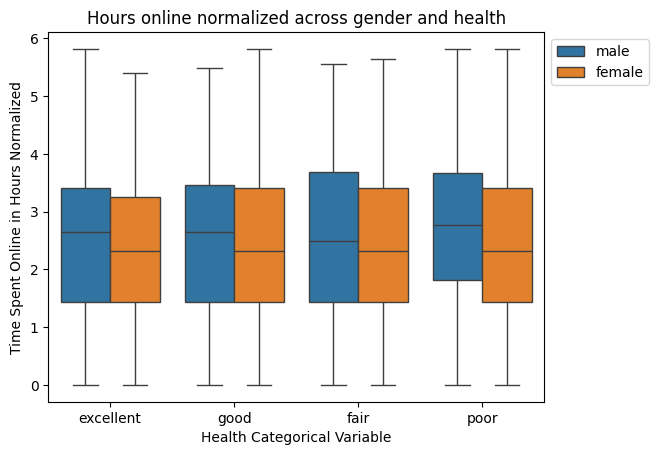

In [ ]:
sns.boxplot(x='health', y='hours_online_arcsinh', data=df, hue='sex')
plt.title('Hours online normalized across gender and health')
plt.xlabel('Health Categorical Variable')
plt.ylabel('Time Spent Online in Hours Normalized')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')



Is there a similar distribution of health outcomes to each gender? It appears so

In [ ]:
frequency_table_percent = pd.crosstab(df['health'], df['sex'], normalize='columns') * 100
print(frequency_table_percent)

sex           female       male
health                         
excellent  27.234309  26.966292
fair       17.060573  18.052434
good       51.619972  51.722846
poor        4.085146   3.258427


In [ ]:
median_vals = df.groupby(['health', 'sex'])['hours_online'].median()
print(median_vals)

health     sex   
excellent  female    5.0
           male      7.0
fair       female    5.0
           male      6.0
good       female    5.0
           male      7.0
poor       female    5.0
           male      8.0
Name: hours_online, dtype: float64


object
float64


<Axes: xlabel='age', ylabel='hours_online'>

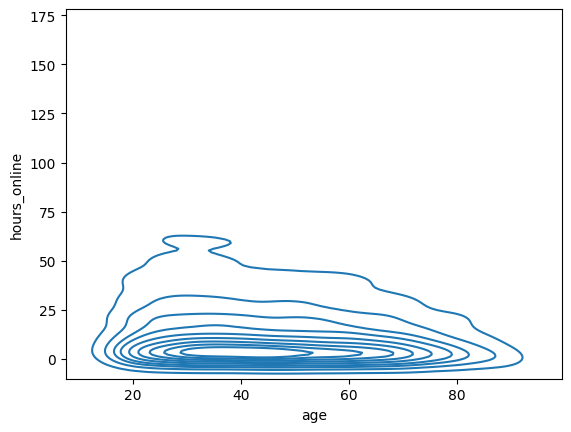

In [ ]:
print(df['age'].dtype)
print(df['hours_online'].dtype)

df['age'] = pd.to_numeric(df['age'], errors = 'coerce').astype('Int64')

sns.kdeplot(data = df, x = 'age', y = 'hours_online')

In [ ]:
#https://pandas.pydata.org/docs/reference/api/pandas.cut.html
bins = [-1, 5, 10, 15, 100]
labels = ['Less than 5', '5-10', '10-15', '15+']

df['hours_online_bins'] = pd.cut(df['hours_online'], bins=bins, labels=labels)

In [ ]:
df.head(20)


,age,sex,webhltbeh,hours_online,happy,health,life,hours_online_arcsinh,age_bins,hours_online_bins
38117,26,male,NaN,5.0,pretty happy,excellent,exciting,2.312438,20-40,Less than 5
38123,36,male,NaN,0.0,very happy,good,exciting,0.000000,20-40,Less than 5
38125,44,male,NaN,1.0,pretty happy,excellent,NaN,0.881374,40-60,Less than 5
38128,52,male,NaN,6.0,pretty happy,good,exciting,2.491780,40-60,5-10
38129,52,male,NaN,1.0,pretty happy,good,routine,0.881374,40-60,Less than 5
38130,51,male,NaN,0.0,very happy,excellent,exciting,0.000000,40-60,Less than 5
38131,52,female,NaN,2.0,pretty happy,excellent,NaN,1.443635,40-60,Less than 5
38138,49,female,NaN,7.0,very happy,excellent,exciting,2.644121,40-60,5-10
38139,19,male,NaN,0.0,pretty happy,excellent,routine,0.000000,Less than 20,Less than 5
38140,54,male,NaN,1.0,pretty happy,good,exciting,0.881374,40-60,Less than 5


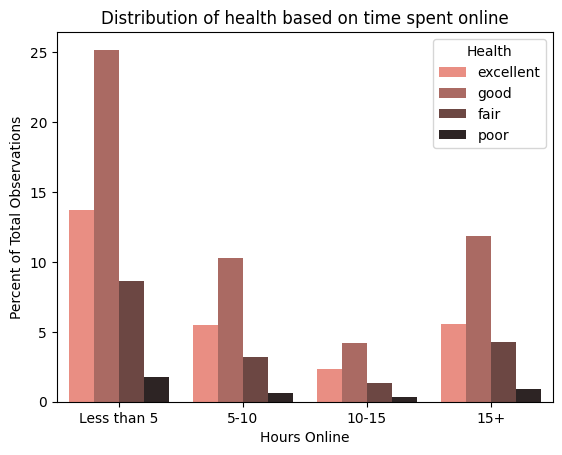

In [ ]:
sns.countplot(x='hours_online_bins', hue='health', data=df, stat='percent', palette = 'dark:salmon_r')
plt.xlabel('Hours Online')
plt.ylabel('Percent of Total Observations')
plt.title('Distribution of health based on time spent online')
plt.legend(title='Health')




In [ ]:
Looking at the relationship between HAPPINESS, GENDER, AND SOCIAL MEDIA HOURS

In [14]:
health_unique = df['happy'].unique()
gender_unique = df['sex'].unique()
hours_unique = df['hours_online'].unique()

print("Happy Unique", health_unique)
print("Gender Unique", gender_unique)
print("Hours Unique", hours_unique)

Happy Unique ['pretty happy' 'very happy' 'not too happy']
Gender Unique ['male' 'female']
Hours Unique [  5.   0.   1.   6.   2.   7.   3.  30.  10.  50.  21.  23.   4.   8.
  20.  16.  15.  40.  60.  14.  25.  17.  12.   9.  42.  35.  45.  36.
  32. 112.  22.  24.  64.  11.  29.  48.  13.  27.  26.  28. 130.  72.
  55.  80.  70.  75.  18. 100.  66. 120.  19.  63.  33.  84.  91.  65.
 140.  86.  90.  47.  38.  56. 105.  95.  83.  49.  98.  46.  57.  68.
 168. 125. 110.  37. 150. 160.  39.  96.  34.  54.  76.  51. 119.  41.
  85. 126.  43.]


Make histogram to compare male vs female average usage of the internet and its impact on happiness

<ipython-input-16-d8bab1581471>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby(['happy', 'sex']).mean().reset_index()


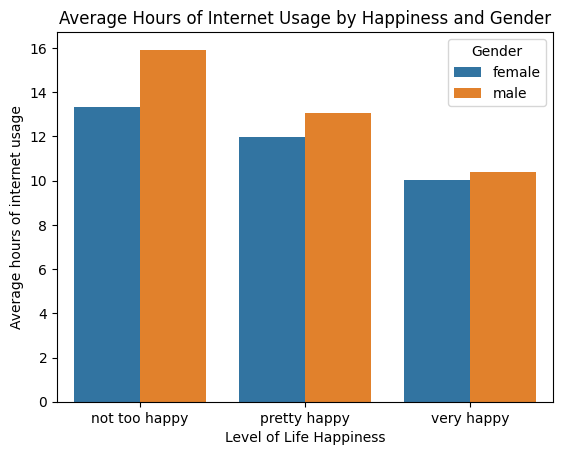

In [16]:
# First group data by happiness types and gender and calculate average hours
grouped_data = df.groupby(['happy', 'sex']).mean().reset_index()

# Plot the histogram using seaborn
sns.barplot(data=grouped_data, x='happy', y='hours_online', hue='sex')

plt.xlabel('Level of Life Happiness')
plt.ylabel('Average hours of internet usage')
plt.title('Average Hours of Internet Usage by Happiness and Gender')
plt.legend(title='Gender')

plt.show()

In [17]:
# generate frequency table
frequency_table_percent = pd.crosstab(df['happy'], df['sex'], normalize='columns') * 100
print(frequency_table_percent)

sex               female       male
happy                              
not too happy  13.637142  14.576271
pretty happy   58.745931  57.507478
very happy     27.616927  27.916251


In [18]:
# showcase median hours spent online
median_vals = df.groupby(['happy', 'sex'])['hours_online'].median()
print(median_vals)

happy          sex   
not too happy  female    6.0
               male      8.0
pretty happy   female    6.0
               male      7.0
very happy     female    5.0
               male      5.0
Name: hours_online, dtype: float64


In [21]:
# showcase variance
variance_vals = df.groupby(['happy', 'sex'])['hours_online'].var()
print(variance_vals)

happy          sex   
not too happy  female    388.087652
               male      418.183164
pretty happy   female    258.123393
               male      271.259134
very happy     female    191.167126
               male      199.963806
Name: hours_online, dtype: float64


In [23]:
# showcase the different quantile values for the hours spent online among genders
quantile_ranges = df.groupby(['happy', 'sex'])['hours_online'].quantile([0.25, 0.5, 0.75])
print(quantile_ranges)

happy          sex         
not too happy  female  0.25     2.00
                       0.50     6.00
                       0.75    16.25
               male    0.25     2.50
                       0.50     8.00
                       0.75    20.00
pretty happy   female  0.25     2.00
                       0.50     6.00
                       0.75    15.00
               male    0.25     3.00
                       0.50     7.00
                       0.75    18.50
very happy     female  0.25     2.00
                       0.50     5.00
                       0.75    14.00
               male    0.25     2.00
                       0.50     5.00
                       0.75    14.00
Name: hours_online, dtype: float64
